<a href="https://colab.research.google.com/github/kurt980/kurt980/blob/main/527_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [264]:
import statsmodels.api as sm

In [265]:
df = pd.read_csv('/content/games.csv')

In [266]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [267]:
df = df.dropna(axis=0)

In [268]:
df_1 = df.sample(n = 500).loc[:,~df.columns.isin(['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'GAME_ID', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away', 'PTS_home', 'PTS_away'])]

In [269]:
x_1 = df_1.loc[:,df_1.columns != 'HOME_TEAM_WINS'].reset_index(drop = True) 
y_1 = df_1.loc[:,df_1.columns == 'HOME_TEAM_WINS'].reset_index(drop = True)

In [270]:
x_num = x_1.select_dtypes(include='number')

In [271]:
x_norm = (x_num - x_num.mean()) / (x_num.max() - x_num.min())

In [272]:
x_1[x_norm.columns] = x_norm

In [273]:
x_1

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,-0.082693,-0.178588,0.061032,0.012897,0.3481,-0.164101,0.241577,0.100501,0.044303,0.098103
1,-0.472786,-0.188822,-0.294968,-0.228483,0.3731,-0.279485,-0.095754,-0.429580,-0.107212,0.354513
2,0.065913,0.053868,-0.090968,-0.194000,-0.2519,0.043000,-0.031286,-0.003564,-0.289030,-0.055744
3,0.056625,0.068488,-0.190968,-0.194000,-0.1019,-0.101970,0.093151,0.001314,0.044303,-0.132667
4,-0.085789,0.056792,0.305032,-0.159517,0.0231,-0.039840,0.102147,0.066354,-0.046606,-0.107026
...,...,...,...,...,...,...,...,...,...,...
495,0.214520,0.012933,-0.028301,0.185310,-0.0519,-0.084219,0.040678,-0.042589,-0.046606,-0.055744
496,-0.073406,-0.301395,0.238365,-0.090552,-0.1269,0.004538,-0.233685,-0.297873,0.135212,-0.081385
497,0.146409,-0.049933,-0.066968,-0.194000,-0.2269,-0.096053,-0.008798,0.228956,-0.228424,-0.363436
498,-0.129133,-0.080635,0.086365,0.047379,-0.1519,0.368444,-0.071766,0.206192,0.347333,0.277590


In [274]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_1))

In [275]:
y_1 = y_1['HOME_TEAM_WINS']

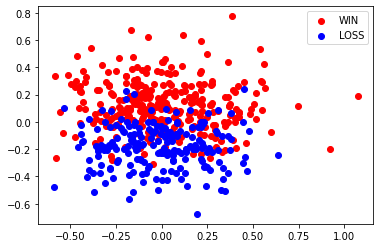

In [276]:
plt.scatter(transformed[y_1==1][0], transformed[y_1==1][1], label='WIN', c='red')
plt.scatter(transformed[y_1==0][0], transformed[y_1==0][1], label='LOSS', c='blue')

plt.legend()
plt.show()

Logistic Regression

In [ ]:
log_reg = sm.Logit(y_train, x_train).fit()

In [302]:
# split train and test by 4:1
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size=0.2)

In [303]:
accuracy_score(y_test, list(map(round, log_reg.predict(x_test))))

0.78

In [304]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:         HOME_TEAM_WINS   No. Observations:                  400
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                            9
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4566
Time:                        04:14:34   Log-Likelihood:                -147.31
converged:                       True   LL-Null:                       -271.10
Covariance Type:            nonrobust   LLR p-value:                 3.229e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
FG_PCT_home      9.3909      1.462      6.421      0.000       6.525      12.257
FT_PCT_home      3.3241      1.064      3.125      0.002       1.239       5.409
FG3_PCT_home     3.6339      1.117      3.25

Polynomial Logistic

In [312]:
poly = PolynomialFeatures(degree = 1, interaction_only=False, include_bias = True)
x_poly = poly.fit_transform(x_train)
x_poly.shape

(400, 11)

In [313]:
log_reg_poly = sm.Logit(y_train, x_poly).fit()

Optimization terminated successfully.
         Current function value: 0.303754
         Iterations 8


In [ ]:
print(log_reg_poly.summary())

In [315]:
accuracy_score(y_test, list(map(round, log_reg_poly.predict(poly.fit_transform(x_test)))))

0.8